<a href="https://colab.research.google.com/github/Jake-LJH/default-prediction/blob/master/cc_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Method to estimate the real probability of default. 

With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

Link: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


##Attribute Information:

This research employed a binary variable, default payment (Yes = <code>1</code>, No = <code>0</code>), as the response variable. 

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 

Scale: 

-2 = Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period)

-1 = Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due

0 = Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance, 

1 = payment delay for one month, 2 = payment delay for two months, … 8=payment delay for eight months, 9 = payment delay for nine months and above

* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

#Import all the metrics for validation and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns
#ROC Curve
from sklearn.metrics import plot_roc_curve

# Data Exploratory

In [36]:
dataset = pd.read_csv('UCI_Credit_Card.csv',index_col=0)
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [37]:
print("Shape of dataset "+str(dataset.shape))
print('*'*40)
print(dataset.info())

Shape of dataset (30000, 24)
****************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2         

In [38]:
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data Engineering

In [39]:
X = dataset.drop('default.payment.next.month', axis=1)
y = dataset['default.payment.next.month']

In [40]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
21754,80000.0,2,2,2,24,0,0,0,0,0,...,78321.0,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0
252,30000.0,1,2,2,28,0,0,0,0,0,...,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0
22942,180000.0,2,5,1,44,0,0,-1,-1,-1,...,850.0,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0
619,60000.0,1,1,2,25,0,0,0,0,0,...,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0
17091,130000.0,2,2,2,25,0,0,0,0,0,...,114734.0,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0


In [41]:
numeric_cols = X[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].columns

print(numeric_cols)

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'EDUCATION', 'MARRIAGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
      dtype='object')


In [42]:
numeric_transformers = Pipeline(steps=[
                               ('scaler',StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers = [
                    ('num',numeric_transformers, numeric_cols)
                 
    ]
)

# Handling Class Imbalance using undersampling

C:\Users\kamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


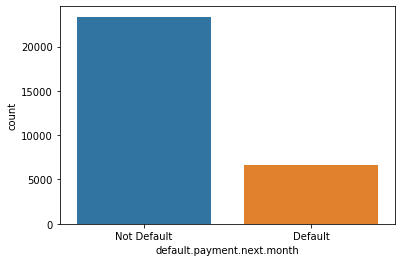

In [43]:
# visualize the target variable
g = sns.countplot(dataset['default.payment.next.month'])
g.set_xticklabels(['Not Default','Default'])
plt.show()

In [44]:
# class count
class_count_0, class_count_1 = dataset['default.payment.next.month'].value_counts()

# Separate class
class_0 = dataset[dataset['default.payment.next.month'] == 0]
class_1 = dataset[dataset['default.payment.next.month'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (23364, 24)
class 1: (6636, 24)


total class of 1 and 0: 1    6636
0    6636
Name: default.payment.next.month, dtype: int64


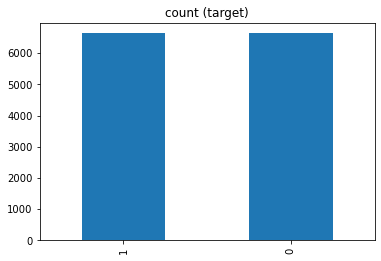

In [45]:
#Under sample the non-default class
class_0_under = class_0.sample(class_count_1)

#concatenate the equalized default and non-default data
test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['default.payment.next.month'].value_counts())

# plot the count after under-sampeling
test_under['default.payment.next.month'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [46]:
X_undersample = test_under.drop('default.payment.next.month', axis=1)
y_undersample = test_under['default.payment.next.month']


In [47]:
from sklearn.model_selection import train_test_split
X_train_undersample, x_test_undersample, Y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.20, random_state=42)
X_train_undersample.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
10427,500000.0,2,1,1,40,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,522.0,0.0,0.0,0.0,0.0,522.0,117.0
24525,140000.0,1,2,2,41,0,0,0,0,0,...,141805.0,26141.0,7373.0,81185.0,10000.0,10000.0,5000.0,6000.0,76000.0,3000.0
533,10000.0,1,2,2,46,0,0,2,2,2,...,6143.0,6908.0,6652.0,6785.0,2400.0,0.0,871.0,0.0,244.0,251.0
26058,50000.0,2,3,1,27,2,0,0,0,2,...,38498.0,40644.0,39731.0,35657.0,27234.0,1754.0,2900.0,0.0,1265.0,832.0
16172,350000.0,2,2,2,40,-2,-2,-2,-2,-2,...,38491.0,4683.0,3797.0,6677.0,22181.0,38683.0,4706.0,3816.0,6708.0,20105.0


In [48]:
classifiers = [
               GaussianNB(),
               KNeighborsClassifier(),
               LinearSVC(),
               LogisticRegression(random_state=1),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier(),
               BernoulliNB(),                              
               ]

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd
params = []
scores = []
for clf in classifiers:
  pipeline = Pipeline(
      steps =[
              ('preprocessor',preprocessor),
              ('classifier',clf)
      ]
  )
  #Fit the model
  pipeline.fit(X_train_undersample, Y_train_undersample)


  #getting the score of the classifiers
  score = pipeline.score(x_test_undersample,y_test_undersample)
  print("%s score : %.3f" %(clf.__class__.__name__, score))


  y_pred_undersample = pipeline.predict(x_test_undersample)
  roc = roc_auc_score(y_test_undersample, y_pred_undersample)
  acc = accuracy_score(y_test_undersample, y_pred_undersample)
  prec = precision_score(y_test_undersample, y_pred_undersample)
  rec = recall_score(y_test_undersample,y_pred_undersample)
  f1 = f1_score(y_test_undersample, y_pred_undersample)
  
  
  cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC']
  score = [clf.__class__.__name__, acc, prec, rec, f1, roc]

  scores.append(score)    
            
  scores_df = pd.DataFrame(scores, columns=cols)
  list_params = [pipeline, score, x_test_undersample, y_test_undersample, clf.__class__.__name__]
  params.append(list_params)



GaussianNB score : 0.588
KNeighborsClassifier score : 0.656


C:\Users\kamal\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC score : 0.661
LogisticRegression score : 0.661
RandomForestClassifier score : 0.684
DecisionTreeClassifier score : 0.625
[14:30:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kamal\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier score : 0.675
BernoulliNB score : 0.658


In [50]:
#Scores
print(scores_df)

                    Model  Accuracy  Precision    Recall  F1 Score       ROC
0              GaussianNB  0.587571   0.558532  0.845980  0.672841  0.586888
1    KNeighborsClassifier  0.655744   0.665345  0.630353  0.647377  0.655811
2               LinearSVC  0.660640   0.672552  0.629602  0.650369  0.660722
3      LogisticRegression  0.661394   0.670616  0.637866  0.653831  0.661456
4  RandomForestClassifier  0.683616   0.714410  0.614576  0.660743  0.683798
5  DecisionTreeClassifier  0.625235   0.625186  0.630353  0.627759  0.625222
6           XGBClassifier  0.674576   0.689992  0.637115  0.662500  0.674675
7             BernoulliNB  0.657627   0.670989  0.622089  0.645614  0.657721


In [51]:
#Choose the best model and create a pipeline
rf_clf = RandomForestClassifier()
final_pipeline = Pipeline(
    steps = [
             ('preprocessor', preprocessor),
             ('classifier', rf_clf)
    ]
)
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'EDUCATION', 'MARRIAGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

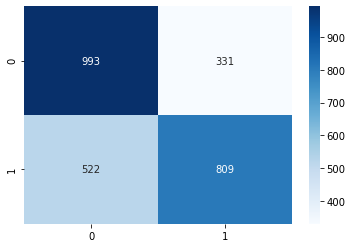

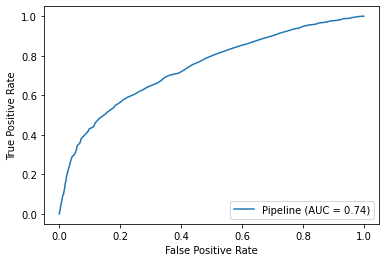

In [52]:
rf_model = final_pipeline.fit(X_train_undersample, Y_train_undersample)
y_pred_undersample = rf_model.predict(x_test_undersample)

cm = confusion_matrix(y_test_undersample, y_pred_undersample)
sns.heatmap(cm, annot=True, cmap="Blues" ,fmt =".0f")
#some test comment
roc = plot_roc_curve(rf_model, x_test_undersample, y_test_undersample)

In [53]:
report = classification_report(y_test_undersample, y_pred_undersample)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1324
           1       0.71      0.61      0.65      1331

    accuracy                           0.68      2655
   macro avg       0.68      0.68      0.68      2655
weighted avg       0.68      0.68      0.68      2655



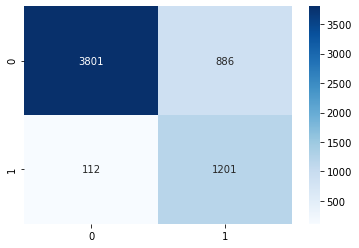

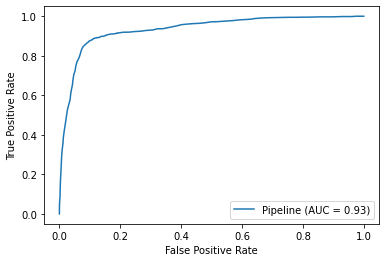

In [54]:

y_pred = rf_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues" ,fmt =".0f");

roc = plot_roc_curve(rf_model, x_test, y_test)

In [55]:
report = classification_report(y_test, y_pred)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      4687
           1       0.58      0.91      0.71      1313

    accuracy                           0.83      6000
   macro avg       0.77      0.86      0.80      6000
weighted avg       0.88      0.83      0.85      6000



# Feature Ranking

In [56]:
def plot_most_important_features(feat_imp, method='MDI', 
                                 n_features=10, bottom=False):
        
    if bottom:
        indicator = 'Bottom'
        feat_imp = feat_imp.sort_values(ascending=True)
    else:
        indicator = 'Top'
        feat_imp = feat_imp.sort_values(ascending=False)
        
    ax = feat_imp.head(n_features).plot.barh()
    ax.invert_yaxis()
    ax.set(title=('Feature importance - '
                  f'{method} ({indicator} {n_features})'), 
           xlabel='Importance', 
           ylabel='Feature')
    
    return ax

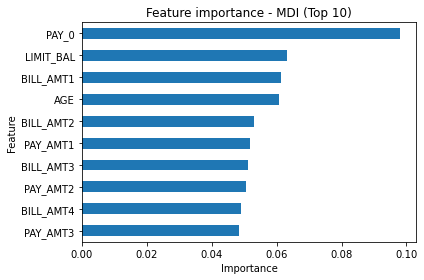

In [57]:
feat_names = np.r_[numeric_cols]
rf_classifier = rf_model.named_steps['classifier']
rf_feat_imp = pd.DataFrame(rf_classifier.feature_importances_,
                           index=feat_names,
                           columns=['mdi'])
rf_feat_imp = rf_feat_imp.sort_values('mdi', ascending=False)
rf_feat_imp['cumul_importance_mdi'] = np.cumsum(rf_feat_imp.mdi)

plot_most_important_features(rf_feat_imp.mdi, 
                             method='MDI')

plt.tight_layout()
plt.show()